In [15]:
import matplotlib.pyplot as plt
import numpy as np

C:\Users\mwdzi\AppData\Local\Temp\ipykernel_7512\3400440789.py:2: RuntimeWarning: overflow encountered in scalar multiply
  return x * (x - 1) * (x - 2)


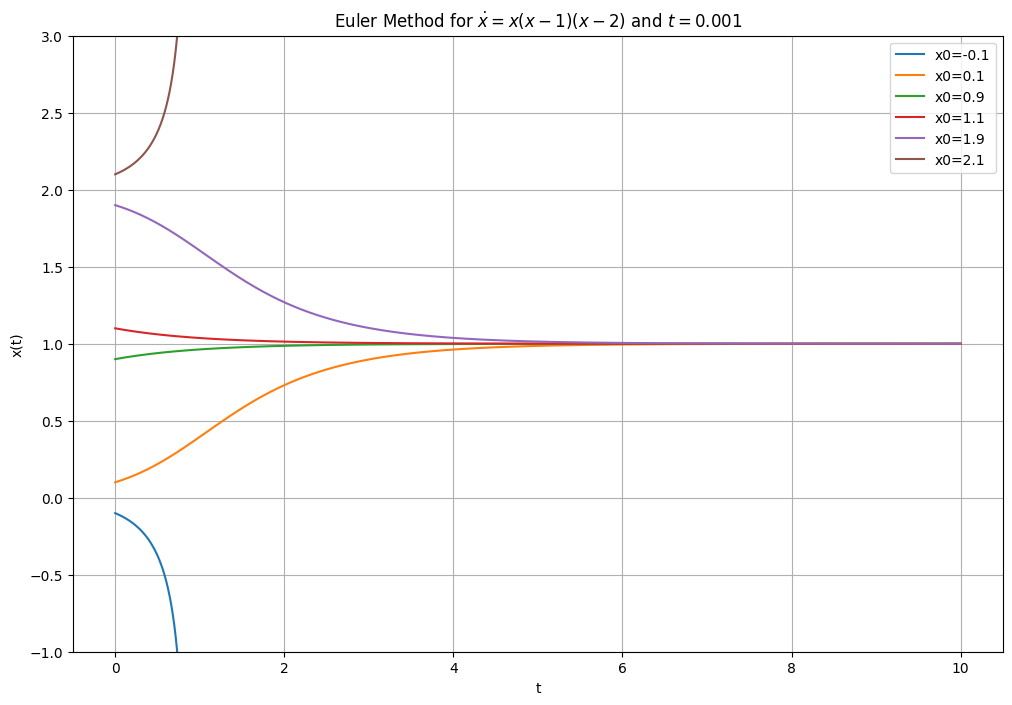

In [ ]:
def f(x):
    return x * (x - 1) * (x - 2)


def euler_method(x0, dt, t_max):
    t_values = np.arange(0, t_max, dt)
    x_values = np.zeros_like(t_values)
    x_values[0] = x0

    for i in range(1, len(t_values)):
        x_values[i] = x_values[i - 1] + dt * f(x_values[i - 1])

    return t_values, x_values


initial_conditions = [-0.1, 0.1, 0.9, 1.1, 1.9, 2.1]
time_steps = [0.001]
t_max = 10

plt.figure(figsize=(12, 8))

for dt in time_steps:
    for x0 in initial_conditions:
        t_values, x_values = euler_method(x0, dt, t_max)
        plt.plot(t_values, x_values, label=f"x0={x0}")

plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Euler Method for $\dot{x} = x(x-1)(x-2)$ and $t=0.001$")
plt.legend()
plt.grid(True)
plt.ylim(-1, 3)
plt.show()

In [17]:
MAX_VALUE = 1e4

In [ ]:
# Midpoint method implementation
def midpoint_step(x, y, f, dt):
    fx, fy = f(x, y)
    kx = dt * fx
    ky = dt * fy
    x_next = x + dt * f(x + kx / 2, y + ky / 2)[0]
    y_next = y + dt * f(x + kx / 2, y + ky / 2)[1]

    # Prevent overflow by clamping values
    max_value = MAX_VALUE  # Define a reasonable maximum
    x_next = max(min(x_next, max_value), -max_value)
    y_next = max(min(y_next, max_value), -max_value)
    return x_next, y_next

def phase_portrait(f, x0, y0, dt=0.01, steps=10000):
    x, y = x0, y0
    xs, ys = [x], [y]
    for _ in range(steps):
        x, y = midpoint_step(x, y, f, dt)
        xs.append(x)
        ys.append(y)
        # Early termination if trajectory goes out of bounds
        if abs(x) > MAX_VALUE or abs(y) > MAX_VALUE:
            break
    return xs, ys



C:\Users\mwdzi\AppData\Local\Temp\ipykernel_7512\4225786328.py:46: RuntimeWarning: xtol=0.001000 is too small, no further improvement in the approximate
  solution is possible.
  x, y = fsolve(equations, x0, xtol=1e-3)
C:\Users\mwdzi\AppData\Local\Temp\ipykernel_7512\4225786328.py:46: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  x, y = fsolve(equations, x0, xtol=1e-3)


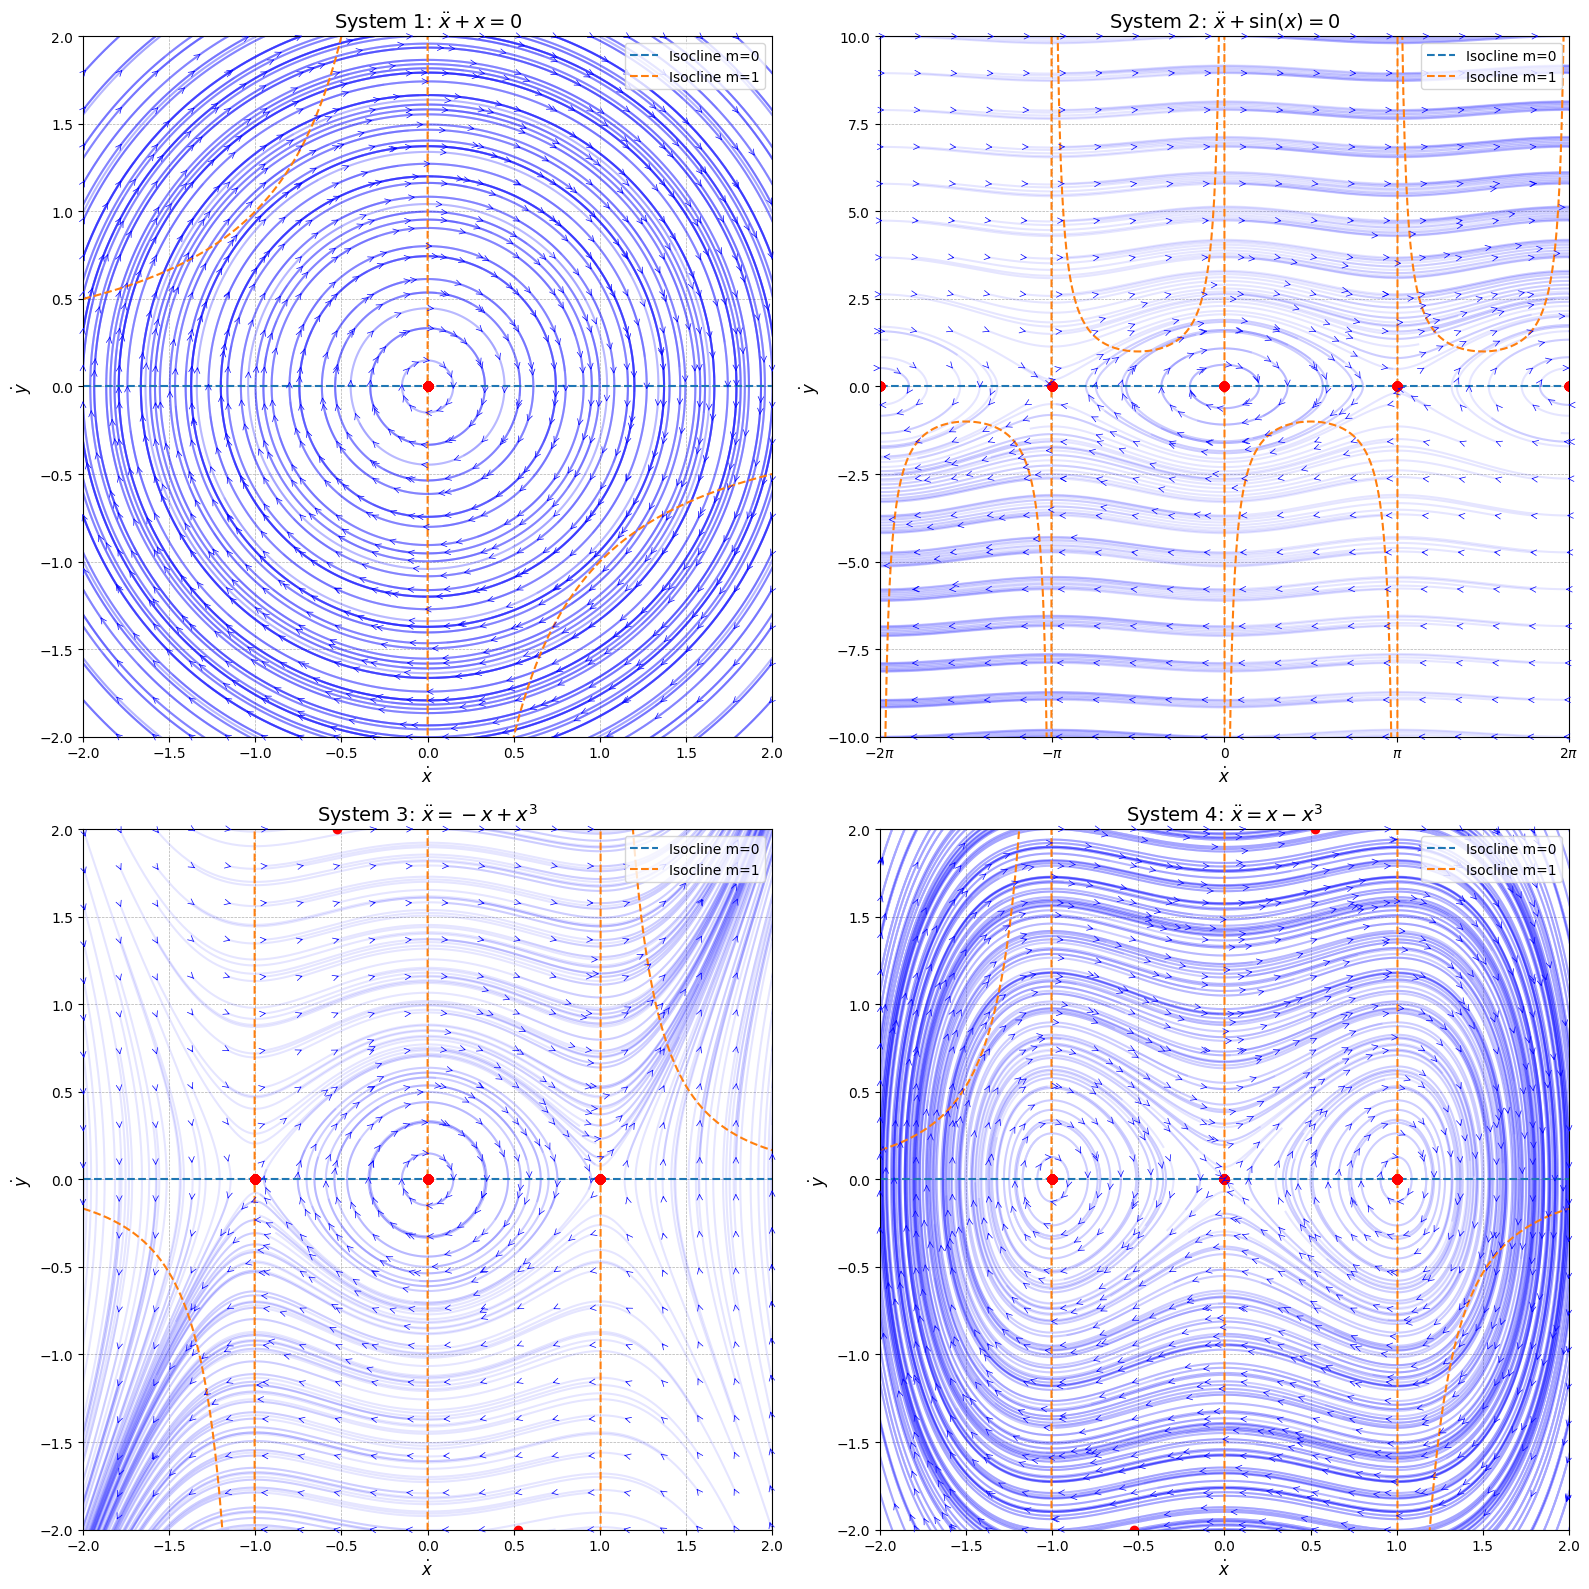

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define the systems
def system1(x, y): return y, -x
def system2(x, y): return y, -np.sin(x)
def system3(x, y): return y, -x + x**3
def system4(x, y): return y, x - x**3

systems = [system1, system2, system3, system4]

titles = [
    "System 1: $\ddot{x} + x = 0$",
    "System 2: $\ddot{x} + \sin(x) = 0$",
    "System 3: $\ddot{x} = -x + x^3$",
    "System 4: $\ddot{x} = x - x^3$",
]

def generate_initial_conditions(x_min, x_max, y_min, y_max, num_points):
    x = np.linspace(x_min, x_max, num_points)
    y = np.linspace(y_min, y_max, num_points)
    X, Y = np.meshgrid(x, y)
    initial_conditions = list(zip(X.flatten(), Y.flatten()))
    return initial_conditions

def calculate_isocline(f, slope, x_range, resolution=500):
    xs = np.linspace(*x_range, resolution)
    ys = []
    for x in xs:
        try:
            fx, fy = f(x, 1)  
            y = slope * fx / fy
            ys.append(y)
        except ZeroDivisionError:
            ys.append(np.nan)  
    return xs, ys

def find_intersections(f1, f2, x0):
    def equations(p):
        x, y = p
        return (f1(x, y), f2(x, y))
    x, y = fsolve(equations, x0, xtol=1e-3)
    return x, y

x_min, x_max = -2, 2
y_min, y_max = -2, 2
x_min_system_2, x_max_system_2 = -2 * np.pi, 2 * np.pi
y_min_system_2, y_max_system_2 = -10, 10
num_points = 20  

dt = 0.01
steps = 500

slopes = [0, 1]

fig, axes = plt.subplots(2, 2, figsize=(16, 16))

for idx, (f, title) in enumerate(zip(systems, titles)):
    ax = axes[idx // 2, idx % 2]

    if idx == 1:
        initial_conditions = generate_initial_conditions(x_min_system_2, x_max_system_2, y_min_system_2, y_max_system_2, num_points)
    else:
        initial_conditions = generate_initial_conditions(x_min, x_max, y_min, y_max, num_points)
    
    # Plot phase trajectories
    for x0, y0 in initial_conditions:
        xs, ys = phase_portrait(f, x0, y0, dt, steps)
        ax.plot(xs, ys, color='blue', alpha=0.1)  
        for i in range(0, len(xs)-1, 200):  
            ax.annotate('', xy=(xs[i+1], ys[i+1]), xytext=(xs[i], ys[i]),
                        arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle='->', lw=0.5))
    
    isoclines = []
    x_range = (x_min, x_max) if idx != 1 else (x_min_system_2, x_max_system_2)
    for slope in slopes:
        isocline_xs, isocline_ys = calculate_isocline(f, slope, x_range)
        ax.plot(isocline_xs, isocline_ys, linestyle="--", label=f"Isocline m={slope}")
        isoclines.append((isocline_xs, isocline_ys))
    
    if len(isoclines) > 1:
        intersections = []
        for i in range(len(isoclines)):
            for j in range(i+1, len(isoclines)):
                for x0 in initial_conditions:
                    try:
                        x, y = find_intersections(lambda x, y: f(x, y)[0] - slopes[i] * f(x, y)[1],
                                                  lambda x, y: f(x, y)[0] - slopes[j] * f(x, y)[1],
                                                  x0)
                        if np.isfinite(x) and np.isfinite(y):
                            intersections.append((x, y))
                    except:
                        continue
        for x, y in intersections:
            ax.plot(x, y, 'ro') 
    
    # Set plot titles and labels
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("$\dot{x}$", fontsize=12)
    ax.set_ylabel("$\dot{y}$", fontsize=12)
    if idx == 1:
        ax.set_xlim(x_min_system_2, x_max_system_2)
        ax.set_ylim(y_min_system_2, y_max_system_2)
        ax.set_xticks([-2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi])
        ax.set_xticklabels(['$-2\pi$', '$-\pi$', '0', '$\pi$', '$2\pi$'])
    else:
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Create a custom legend to avoid clutter
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

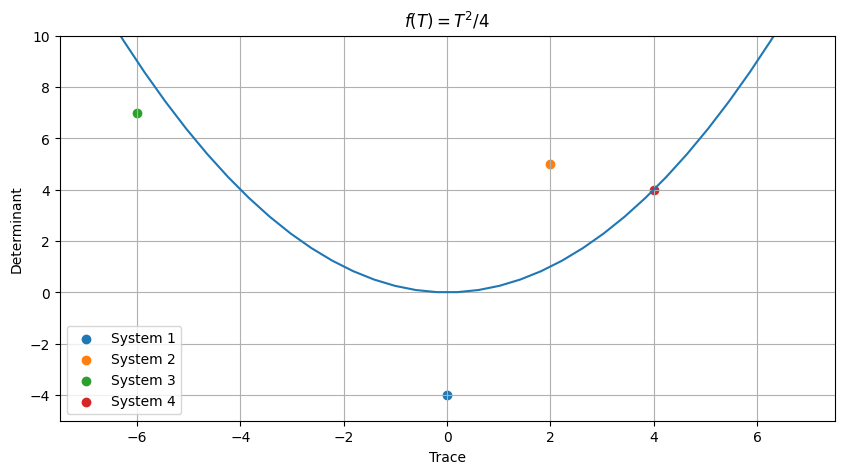

In [39]:
matrices = [
        np.array([[-2, 1], [0, 2]]),
        np.array([[3, -4], [2, -1]]),
        np.array([[-3, -2], [-1, -3]]),
        np.array([[2, 0], [0, 2]]),
    ]

coefficients = [(np.linalg.det(A), np.trace(A)) for A in matrices]

def f_t(t):
    return t**2 / 4

t_values = np.linspace(-20, 20, 100)
f_t_values = [f_t(t) for t in t_values]

plt.figure(figsize=(10, 5))

plt.plot(t_values, f_t_values)

# Plot the coefficients
for i, (det_A, tr_A) in enumerate(coefficients):
    plt.scatter(
        tr_A, det_A, label=f"System {i+1}"
    )

plt.xlabel("Trace")
plt.ylabel("Determinant")
plt.title("$f(T)=T^2/4$")
plt.legend()
plt.grid()
plt.xlim(-7.5, 7.5)
plt.ylim(-5, 10)
plt.show()


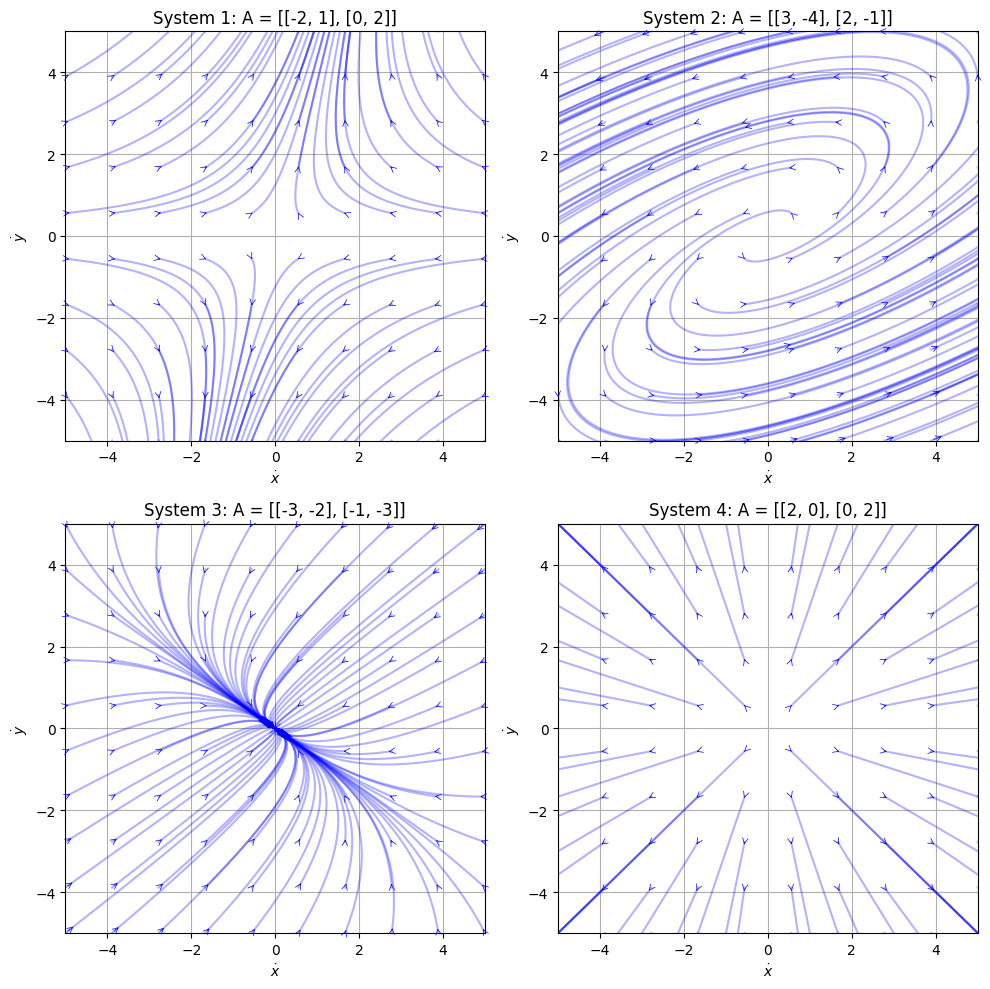

In [40]:
def system1(x, y):
    return -2 * x + y, 2 * y


def system2(x, y):
    return 3 * x - 4 * y, 2 * x - y


def system3(x, y):
    return -3 * x - 2 * y, -x - 3 * y


def system4(x, y):
    return 2 * x, 2 * y


dt = 0.01
steps = 1000

x_min, x_max = -5, 5
y_min, y_max = -5, 5
num_points = 10  

initial_conditions = generate_initial_conditions(x_min, x_max, y_min, y_max, num_points)

systems = [system1, system2, system3, system4]
titles = [
    "System 1: A = [[-2, 1], [0, 2]]",
    "System 2: A = [[3, -4], [2, -1]]",
    "System 3: A = [[-3, -2], [-1, -3]]",
    "System 4: A = [[2, 0], [0, 2]]",
]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for idx, (f, title) in enumerate(zip(systems, titles)):
    ax = axes[idx // 2, idx % 2]
    for x0, y0 in initial_conditions:
        xs, ys = phase_portrait(f, x0, y0, dt, steps)
        ax.plot(xs, ys, color='blue', alpha=0.3) 
        for i in range(0, len(xs)-1, 200): 
            ax.annotate('', xy=(xs[i+1], ys[i+1]), xytext=(xs[i], ys[i]),
                        arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle='->', lw=0.5))

    ax.set_title(title)
    ax.set_xlabel("$\dot{x}$")
    ax.set_ylabel("$\dot{y}$")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)          
    ax.grid()

plt.tight_layout()
plt.show()


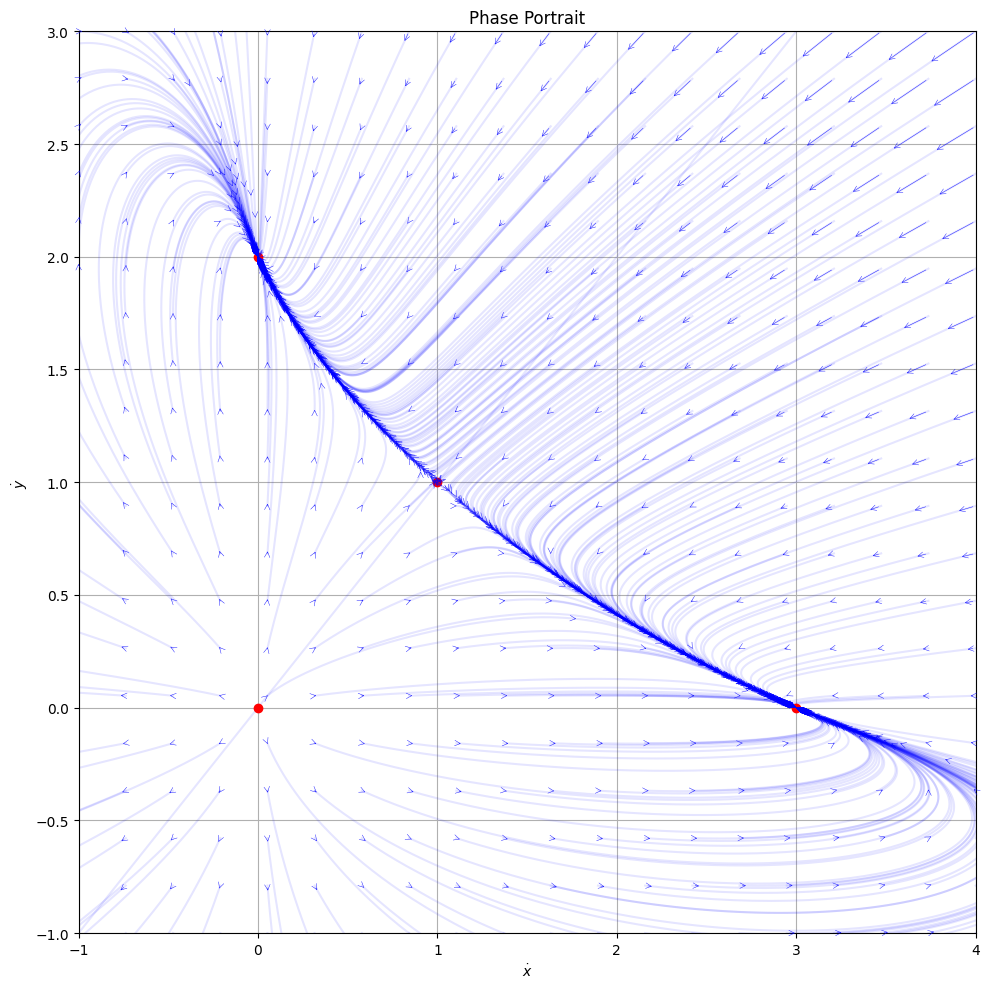

In [ ]:
def system(x, y):
    dx = x * (3 - x - 2 * y)
    dy = y * (2 - x - y)
    return dx, dy

initial_conditions = generate_initial_conditions(-1, 4, -1, 3, 20)
dt = 0.01
steps = 1000

fig, ax = plt.subplots(figsize=(10, 10))

for x0, y0 in initial_conditions:
    xs, ys = phase_portrait(system, x0, y0, dt, steps)
    ax.plot(xs, ys, color='blue', alpha=0.1) 
    for i in range(0, len(xs)-1, 200):  
        ax.annotate('', xy=(xs[i+1], ys[i+1]), xytext=(xs[i], ys[i]),
                    arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle='->', lw=0.3))


fixed_points = [(0, 0), (3, 0), (0, 2), (1, 1)]
for (x_fp, y_fp) in fixed_points:
    ax.plot(x_fp, y_fp, 'ro')

ax.set_title("Phase Portrait")
ax.set_xlabel("$\dot{x}$")
ax.set_ylabel("$\dot{y}$")
ax.set_xlim(-1, 4)
ax.set_ylim(-1, 3)
ax.grid()

plt.tight_layout()
plt.show()

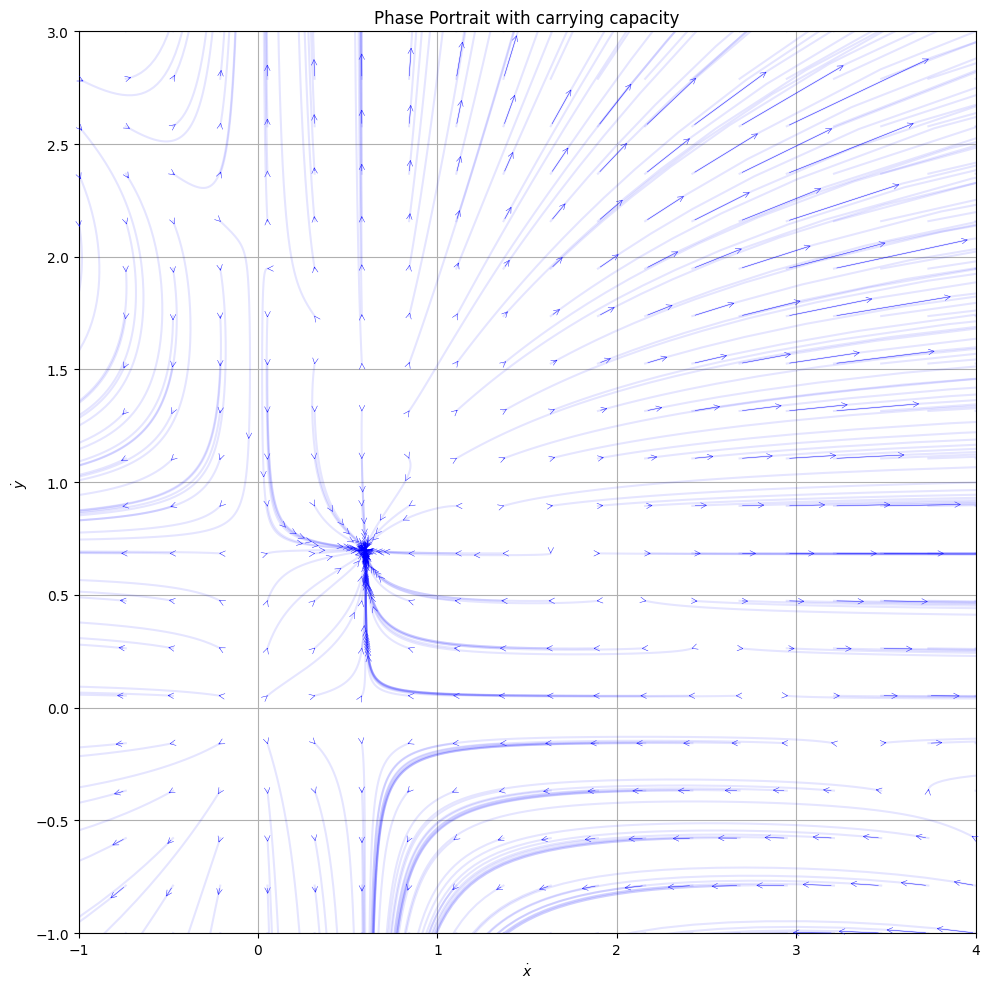

In [ ]:
def system(x, y, a=0.6, b=0.7):
    dx = x * (3 - x - 2 * y)*(1-x/a)
    dy = y * (2 - x - y)*(1-y/b)
    return dx, dy

initial_conditions = generate_initial_conditions(-1, 4, -1, 3, 20)
dt = 0.01
steps = 1000

fig, ax = plt.subplots(figsize=(10, 10))

for x0, y0 in initial_conditions:
    xs, ys = phase_portrait(system, x0, y0, dt, steps)
    ax.plot(xs, ys, color='blue', alpha=0.1)  
    for i in range(0, len(xs)-1, 200): 
        ax.annotate('', xy=(xs[i+1], ys[i+1]), xytext=(xs[i], ys[i]),
                    arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle='->', lw=0.3))


ax.set_title("Phase Portrait with carrying capacity")
ax.set_xlabel("$\dot{x}$")
ax.set_ylabel("$\dot{y}$")
ax.set_xlim(-1, 4)
ax.set_ylim(-1, 3)
ax.grid()

plt.tight_layout()
plt.show()